In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.datasets import *
import warnings
warnings.filterwarnings('ignore')

In [30]:
df=pd.read_csv('mammogram.csv')
df.head()

,BI_RADS_assessment,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,-100000,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,-100000,1


In [114]:
#here -100000 is the null value, we have to replace with NaN .


In [7]:
df.shape

(830, 6)

In [31]:
df=df.replace(-100000,np.NaN)

In [116]:
df.head()

,BI_RADS_assessment,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [117]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BI_RADS_assessment,959.0,4.348279,1.783031,0.0,4.0,4.0,5.0,55.0
age,956.0,55.487448,14.480131,18.0,45.0,57.0,66.0,96.0
shape,930.0,2.721505,1.242792,1.0,2.0,3.0,4.0,4.0
margin,913.0,2.796276,1.566546,1.0,1.0,3.0,4.0,5.0
density,885.0,2.910734,0.380444,1.0,3.0,3.0,3.0,4.0
severity,961.0,0.463059,0.498893,0.0,0.0,0.0,1.0,1.0


### Data Imputation

In [118]:
(df.isnull().sum()/len(df))*100

BI_RADS_assessment    0.208117
age                   0.520291
shape                 3.225806
margin                4.994797
density               7.908429
severity              0.000000
dtype: float64

In [7]:
(df.isnull().mean())*100

BI_RADS_assessment    0.208117
age                   0.520291
shape                 3.225806
margin                4.994797
density               7.908429
severity              0.000000
dtype: float64

In [32]:
df.dropna(inplace=True)
df.head()
df.set_index(np.arange(0,830))

,BI_RADS_assessment,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,5.0,58.0,4.0,5.0,3.0,1
2,4.0,28.0,1.0,1.0,3.0,0
3,5.0,57.0,1.0,5.0,3.0,1
4,5.0,76.0,1.0,4.0,3.0,1
...,...,...,...,...,...,...
825,4.0,47.0,2.0,1.0,3.0,0
826,4.0,56.0,4.0,5.0,3.0,1
827,4.0,64.0,4.0,5.0,3.0,0
828,5.0,66.0,4.0,5.0,3.0,1


In [120]:
df.shape

(830, 6)

In [9]:
(df.isnull().sum()/len(df))*100

BI_RADS_assessment    0.0
age                   0.0
shape                 0.0
margin                0.0
density               0.0
severity              0.0
dtype: float64

In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BI_RADS_assessment,830.0,4.393976,1.888371,0.0,4.0,4.0,5.0,55.0
age,830.0,55.781928,14.671782,18.0,46.0,57.0,66.0,96.0
shape,830.0,2.781928,1.242361,1.0,2.0,3.0,4.0,4.0
margin,830.0,2.813253,1.567175,1.0,1.0,3.0,4.0,5.0
density,830.0,2.915663,0.350936,1.0,3.0,3.0,3.0,4.0
severity,830.0,0.485542,0.500092,0.0,0.0,0.0,1.0,1.0


In [37]:
df["shape"].value_counts()

4.0    379
1.0    190
2.0    180
3.0     81
Name: shape, dtype: int64

In [35]:
df.BI_RADS_assessment.value_counts()

4.0     468
5.0     316
3.0      24
6.0       9
2.0       7
0.0       5
55.0      1
Name: BI_RADS_assessment, dtype: int64

In [6]:
df.severity.value_counts()

0    427
1    403
Name: severity, dtype: int64

In [124]:
df.margin.value_counts()

1.0    320
4.0    254
5.0    127
3.0    106
2.0     23
Name: margin, dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 0 to 960
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BI_RADS_assessment  830 non-null    float64
 1   age                 830 non-null    float64
 2   shape               830 non-null    float64
 3   margin              830 non-null    float64
 4   density             830 non-null    float64
 5   severity            830 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.4 KB


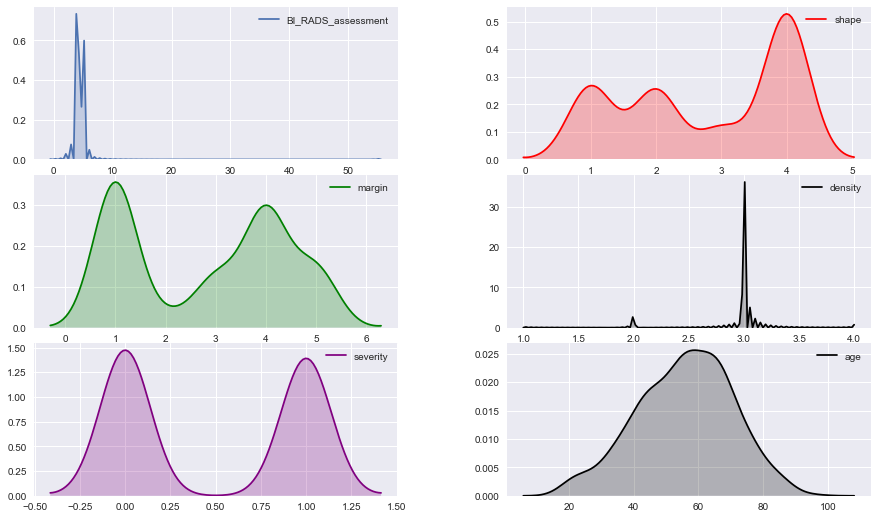

In [125]:
fig,ax=plt.subplots(3,2,figsize=(15,9))
sns.kdeplot(df["BI_RADS_assessment"],shade=True,ax=ax[0,0])
sns.kdeplot(df["shape"],shade=True,color='red',ax=ax[0,1])
sns.kdeplot(df["margin"],shade=True,color='green',ax=ax[1,0])
sns.kdeplot(df["density"],shade=True,color='black',ax=ax[1,1])
sns.kdeplot(df["severity"],shade=True,color='purple',ax=ax[2,0])
sns.kdeplot(df["age"],shade=True,color='black',ax=ax[2,1])
plt.subplots_adjust(wspace=0.3,hspace=0.1)
plt.savefig('skewness of data.png')

# df.BI_RADS_assessment.skew
# ax[0,0].plot.vlines(df.BI_RADS_assessment.mean(),ymin=0.0,ymax=1.2,color='red',label='mean')
# plt.vlines(df.BI_RADS_assessment.median(),ymin=0.0,ymax=1.2,color='black',label='median')

In [126]:
#EDA

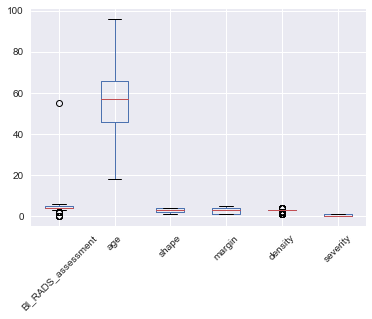

In [127]:
df.plot.box(rot=45)
plt.savefig('outliers.png')

In [128]:
# AS the standard deviation is within the 3sigma, no need to remove the outliers which means outliers play some
#major role in the data

[0, 1, 2, 3]


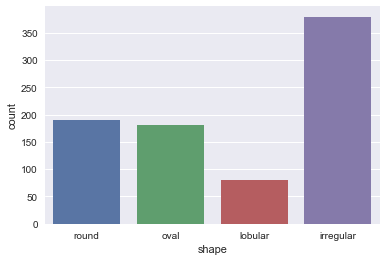

<Figure size 432x288 with 0 Axes>

In [129]:
#how many types of shapes for tumours
sns.countplot(x='shape',data=df)
label=['round', 'oval', 'lobular','irregular']
x_pos=list(range(len(label)))
print(x_pos)
plt.xticks(x_pos,label)
plt.show()
plt.savefig('shape count.png')

In [130]:
#inference 
# Most of the tumour shapes are irregular  compare to others

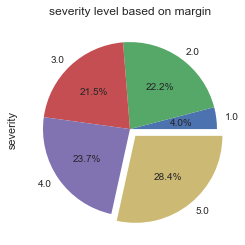

In [131]:
#margin is nothing but mass of the tumour
# fig,ax=plt.subplots(1,2,figsize=(10,5))
df.groupby(['margin'])['severity'].agg('mean').plot.pie(explode=(0,0,0,0,0.1),autopct='%1.1f%%',rot=0)
plt.ylabel('severity')
plt.title('severity level based on margin')
plt.savefig('pie chart.png')
# df.groupby(['margin'])['severity'].agg('mean').plot.bar(rot=0,ax=ax[1,1])

[0, 1, 2, 3, 4]


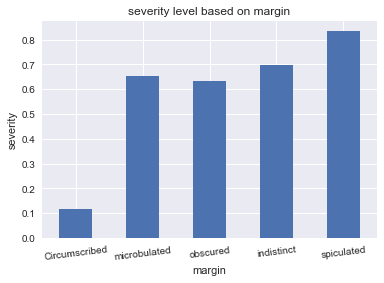

In [132]:
df.groupby(['margin'])['severity'].agg('mean').plot.bar(rot=7)
labels=['Circumscribed','microbulated','obscured','indistinct','spiculated']
x_pos=list(range(len(labels)))
print(x_pos)
plt.xticks(x_pos,labels)
plt.ylabel('severity')
plt.title('severity level based on margin')
plt.savefig('marginseverity.png')

In [26]:
df.head()

,BI_RADS_assessment,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
10,5.0,76.0,1.0,4.0,3.0,1


In [27]:
df["BI_RADS_assessment"].value_counts()

4.0     468
5.0     316
3.0      24
6.0       9
2.0       7
0.0       5
55.0      1
Name: BI_RADS_assessment, dtype: int64

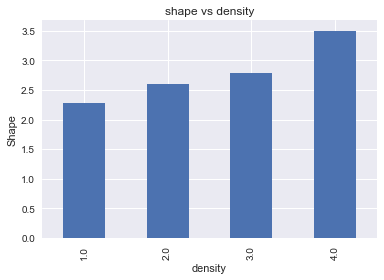

In [134]:
df.groupby('density')['shape'].agg('mean').plot.bar()
plt.ylabel('Shape')
plt.title('shape vs density')
plt.savefig('shape vs density')
# plt.bar(x='severity',height='density',width=0.8)

Text(0.5, 1.0, 'severity Vs Density')

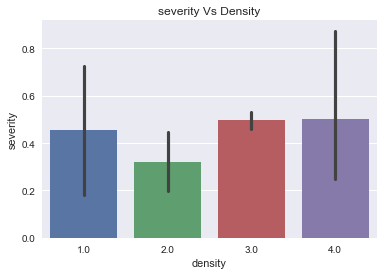

In [135]:
# df.groupby('severity')['density'].agg('mean').plot.bar()
sns.barplot(x='density',y='severity',data=df)
plt.title('severity Vs Density')

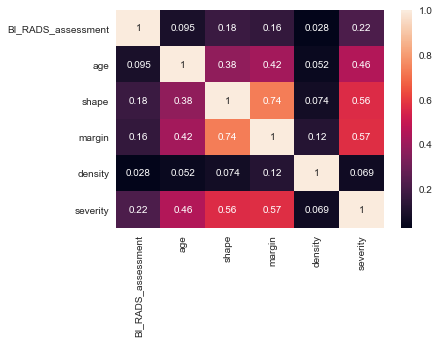

In [136]:
sns.heatmap(df.corr(),annot=True)
plt.savefig('heat_map.png')

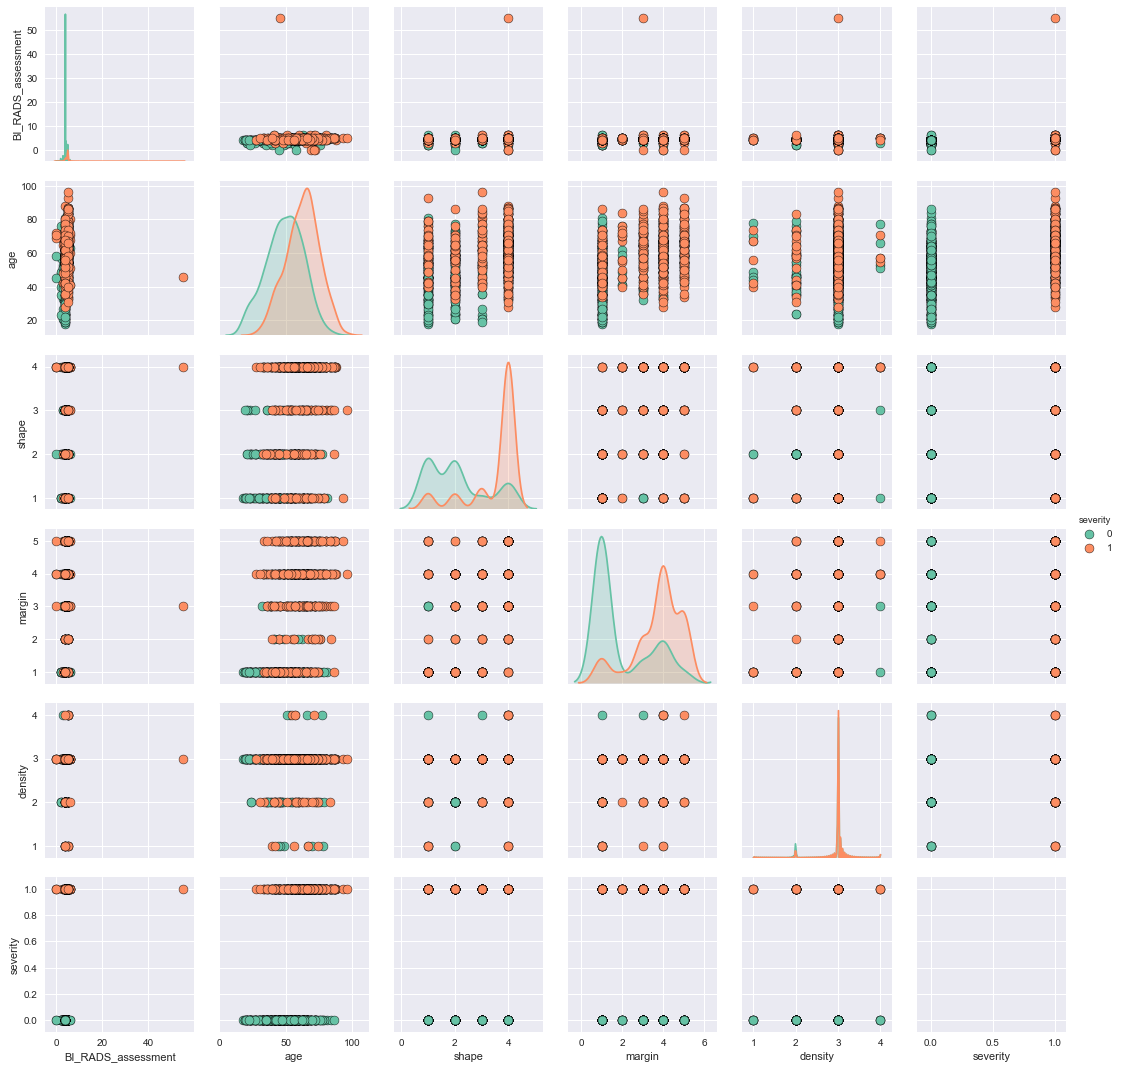

<Figure size 432x288 with 0 Axes>

In [137]:
sns.pairplot(df, kind="scatter", hue="severity", palette="Set2",plot_kws=dict(s=80, edgecolor="black", linewidth=0.4))
plt.show()
plt.savefig('pairplot.png')


#### Logistic REgerssion

In [10]:
from sklearn.linear_model import LogisticRegression

In [9]:
y=df['severity']
X=df.drop('severity',axis=1)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [141]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
y_pred=lr.predict(X_test)

In [6]:
#Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from mlxtend.evaluate import confusion_matrix

In [144]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 98,  40],
       [ 10, 101]])

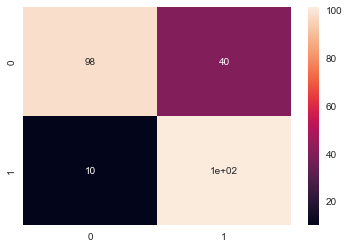

In [145]:
sns.heatmap(cm,annot=True)

TP=101,FN=40,FP=10,TN=98

In [146]:
print('classification_report:\n',classification_report(y_test,y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80       138
           1       0.72      0.91      0.80       111

    accuracy                           0.80       249
   macro avg       0.81      0.81      0.80       249
weighted avg       0.82      0.80      0.80       249



In [147]:
print('Accuracy_score:',accuracy_score(y_test,y_pred))

Accuracy_score: 0.7991967871485943


In [148]:
from sklearn.metrics import roc_curve

[2.         1.         0.94740223 0.94662078 0.90085501 0.89618151
 0.89475566 0.8923175  0.89084504 0.86933392 0.86462162 0.85976679
 0.8547671  0.85286585 0.85155623 0.84747068 0.84631615 0.84432441
 0.84133735 0.84127955 0.83887734 0.83327731 0.83316697 0.82640323
 0.82428031 0.81324121 0.80979209 0.80931707 0.79884381 0.79638485
 0.77732808 0.77129323 0.76859506 0.76587471 0.76560668 0.7590319
 0.75062345 0.74953186 0.72727534 0.7258216  0.72394502 0.72277978
 0.70926094 0.70610979 0.70293878 0.70229502 0.69991491 0.69690852
 0.68886889 0.68004369 0.67108769 0.65210383 0.64934193 0.64516059
 0.64348371 0.63746536 0.62660814 0.62021832 0.61211871 0.59676889
 0.57398783 0.56770881 0.56615495 0.56396663 0.56177582 0.55169173
 0.54755118 0.54561241 0.5374093  0.53519503 0.48417867 0.46098144
 0.45807611 0.45209065 0.4479507  0.42943445 0.42783689 0.34768294
 0.33930937 0.30674304 0.30245127 0.25503586 0.24947055 0.24735002
 0.22523984 0.2164204  0.21129858 0.20446324 0.19941742 0.16753

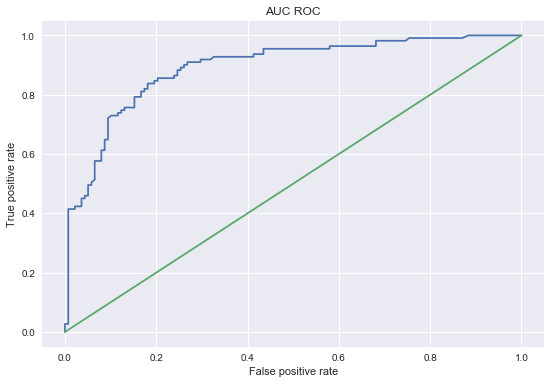

In [149]:
y_pred_probs = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs, drop_intermediate=True)
f, ax = plt.subplots(figsize=(9, 6))
_ = plt.plot(fpr, tpr, [0,1], [0, 1])
_ = plt.title('AUC ROC')
_ = plt.xlabel('False positive rate')
_ = plt.ylabel('True positive rate')
plt.style.use('seaborn')
print(thresholds)
plt.savefig('roc_curve.png')

In [150]:
print('recall value:',metrics.recall_score(y_test,y_pred))

recall value: 0.9099099099099099


In [151]:
print('recall value:',metrics.precision_score(y_test,y_pred))

recall value: 0.7163120567375887


### KNN MODEL

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [152]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [153]:
y_pred=classifier.predict(X_test)

In [154]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.7951807228915663


In [155]:
#K value
from sklearn.model_selection import cross_val_score

In [156]:
k_range=range(1,31)#list of scores from k_range
k_scores=[]
#1.we will loop through resonable values of k
for k in k_range:
   #2.run KNeighborsClassifier with k neighbours
   knn=KNeighborsClassifier(n_neighbors=k)
   #3.Obtain cross_val_score for KNeighborsClassifier with k neighbours
   scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
   #4.append mean of scores for k neighbors to k_scores list
   k_scores.append(scores.mean())
print(k_scores)

[0.7540646908190253, 0.7490848411065867, 0.7961791416537228, 0.7890079481689826, 0.8167348837860151, 0.8095346542966292, 0.7975865133005893, 0.8046709486027736, 0.7927665365293928, 0.7903719407245707, 0.795205910751018, 0.7939426696332368, 0.7964254229461399, 0.8012450498859549, 0.796338664763584, 0.7903425548885437, 0.7915620670836656, 0.7988203685823434, 0.795235296587045, 0.7964404656955348, 0.7904884345745351, 0.8025086408351175, 0.7916498747603655, 0.7928550438688552, 0.7928693869554874, 0.7976890138953024, 0.7904307123966248, 0.7964551586135482, 0.7940308271413179, 0.7964551586135483]


Text(0, 0.5, 'Cross_Validated Accuracy')

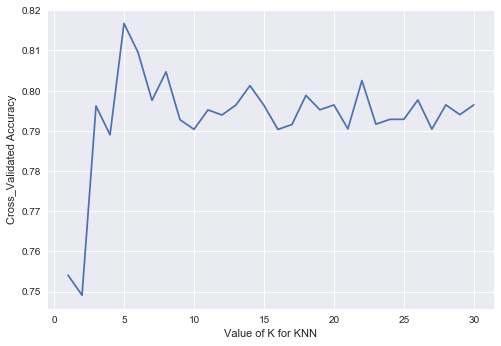

In [157]:
#plot the value of K for KNN(X_axis) versus the cross_validated accuracy(y_axis)
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross_Validated Accuracy')


In [158]:
classifier=KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [159]:
y_pred=classifier.predict(X_test)

In [160]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.7831325301204819


In [161]:
print('the confusion matrix:\n',confusion_matrix(y_test,y_pred))

the confusion matrix:
 [[103  35]
 [ 19  92]]


In [162]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from mlxtend.evaluate import confusion_matrix
from sklearn import metrics

print('precision value:',metrics.precision_score(y_test,y_pred,average='micro'))

precision value: 0.7831325301204819


In [163]:
print('the recall value:',metrics.recall_score(y_test,y_pred,average='micro'))

the recall value: 0.7831325301204819


### Naive Bayes MOdel

In [14]:
from sklearn.naive_bayes import GaussianNB

In [165]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [166]:
y_pred=gnb.predict(X_test)


In [15]:
from mlxtend.evaluate import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [168]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.7991967871485943


In [169]:
print('recall value:',metrics.recall_score(y_test,y_pred))

recall value: 0.9009009009009009


In [170]:
print('recall value:',metrics.precision_score(y_test,y_pred))

recall value: 0.7194244604316546


### Decision Tree

In [171]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [172]:
y_pred=classifier.predict(X_test)

In [173]:
#Building a Decision Tree

In [174]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import os

In [175]:
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

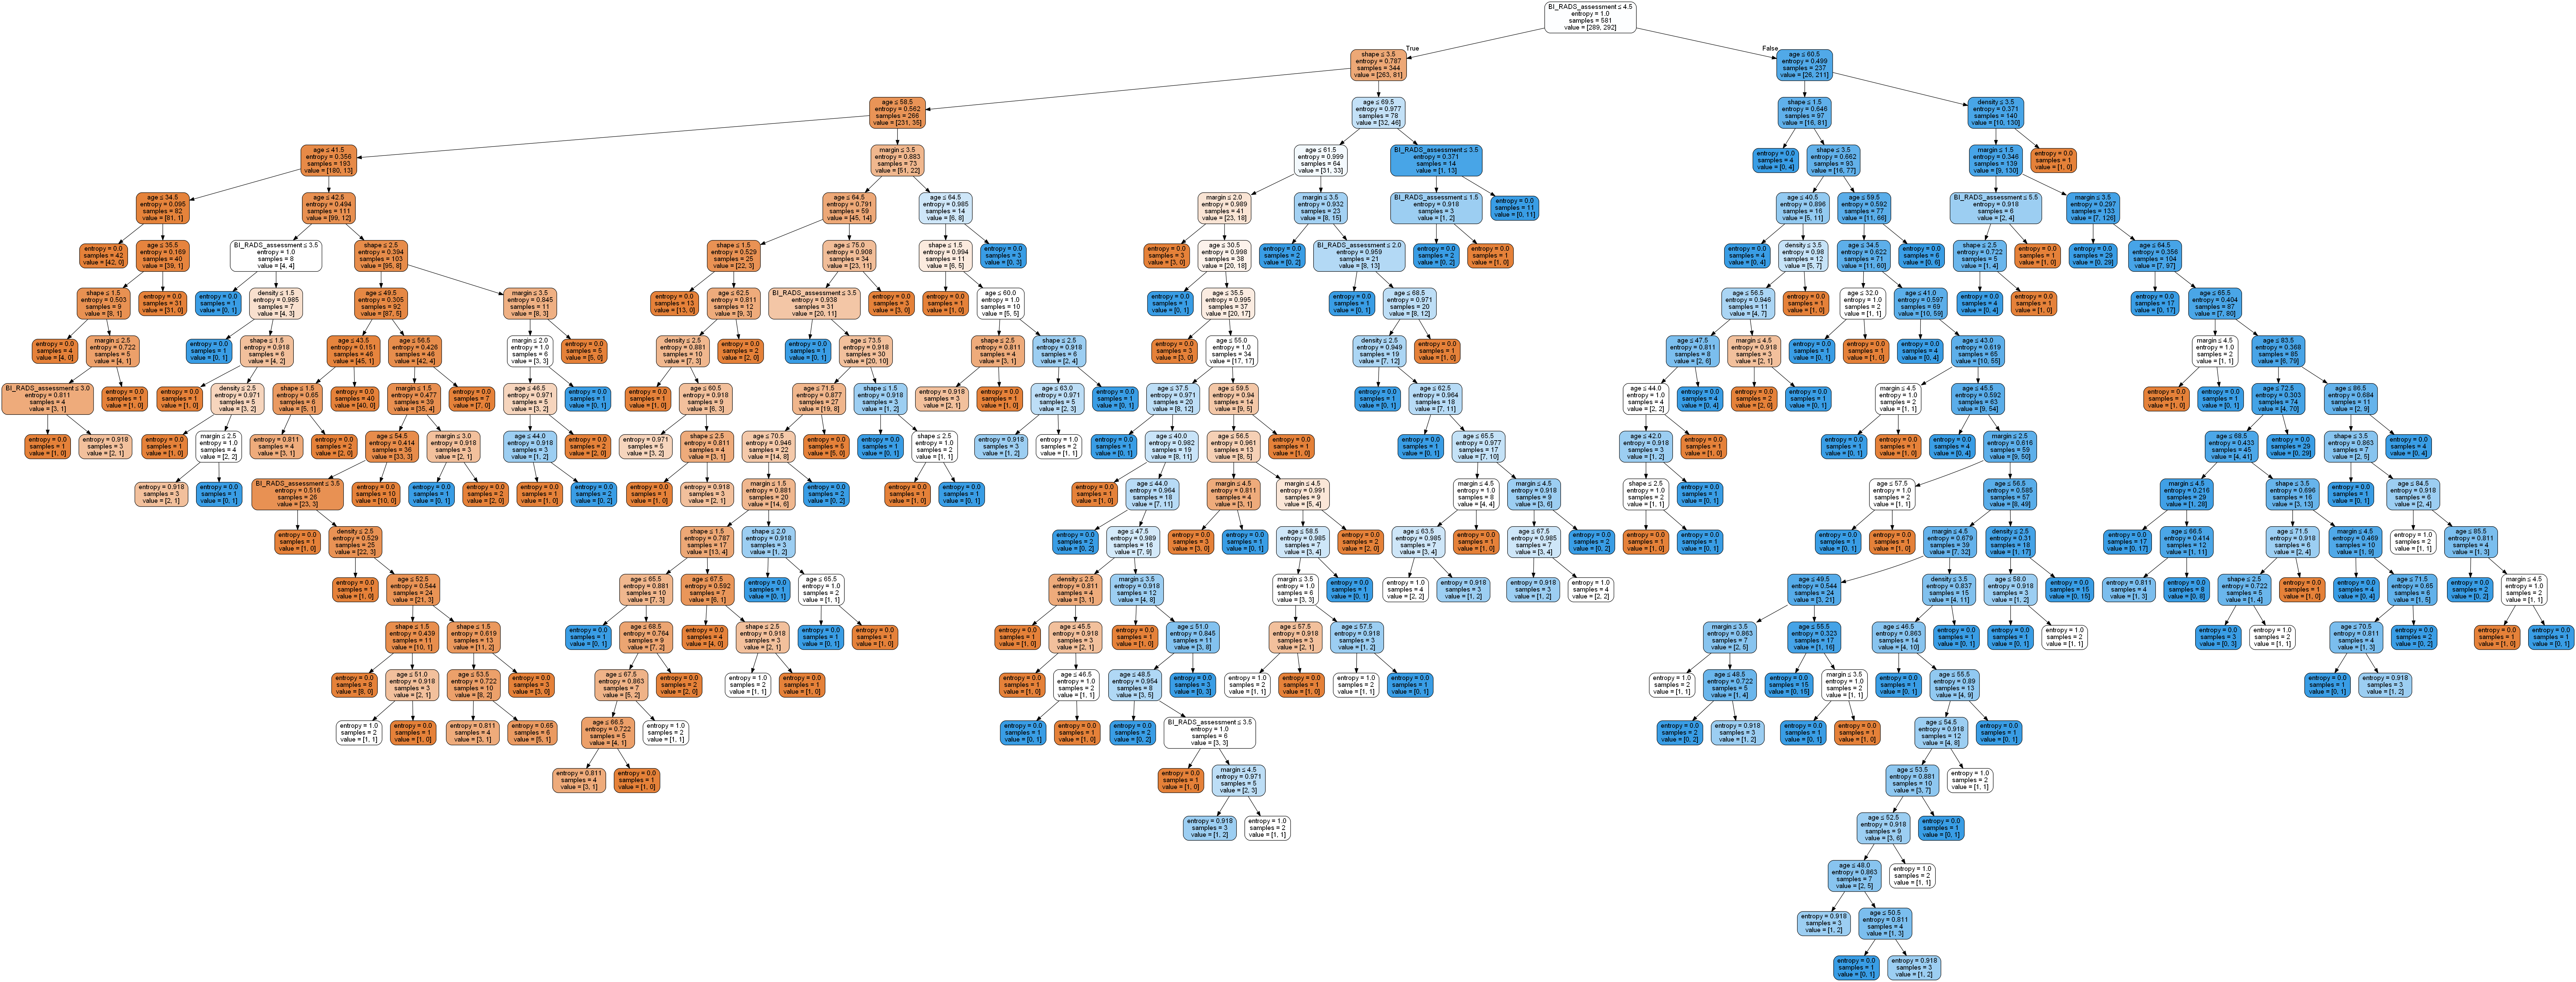

In [176]:
dot_data=StringIO()
export_graphviz(classifier,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=X.columns,
                class_names=None)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('mammogram.png')
Image(graph.create_png())

In [177]:
clf=DecisionTreeClassifier(class_weight=None,
    criterion='entropy',
    splitter='best',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=3,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=5,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    presort=False
)

In [178]:
#train the mode after pruning the tree
clf=clf.fit(X_train,y_train)

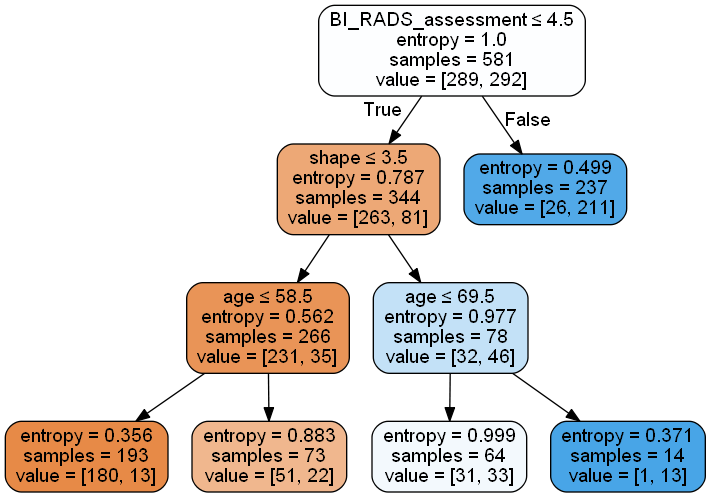

In [179]:
dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=X.columns,
                class_names=None)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())

In [180]:
y_pred=clf.predict(X_test)

In [181]:
print('Accuracy _score:',accuracy_score(y_test,y_pred))

Accuracy _score: 0.8232931726907631


In [182]:
print('recall value:',metrics.recall_score(y_test,y_pred))

recall value: 0.9009009009009009


In [183]:
print('precision value:',metrics.precision_score(y_test,y_pred))

precision value: 0.7518796992481203


### Random Forest

In [184]:
from sklearn.ensemble import RandomForestClassifier
 
    #create a Gaussian Classifier
    
clf=RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
)

In [185]:
clf.fit(X_train,y_train)
#predict the model
y_pred=clf.predict(X_test)

In [186]:
y_pred=clf.predict(X_test)
print('Accuracy _score:',accuracy_score(y_test,y_pred))

Accuracy _score: 0.7991967871485943


In [187]:

print('recall value:',metrics.recall_score(y_test,y_pred))

recall value: 0.8468468468468469


In [188]:
print('Precison value:',metrics.precision_score(y_test,y_pred))

Precison value: 0.7401574803149606


In [189]:
print('classification report:\n',classification_report(y_test,y_pred))

classification report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81       138
           1       0.74      0.85      0.79       111

    accuracy                           0.80       249
   macro avg       0.80      0.80      0.80       249
weighted avg       0.81      0.80      0.80       249



### Bagging

In [16]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [191]:
kfold = model_selection.KFold(n_splits=10, random_state=21)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=1)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7855421686746988


In [192]:
 # fit a ensemble.BaggingClassifier() model to the data
model = BaggingClassifier()
model.fit(X_train, y_train)
print(); print(model)


BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)


In [193]:
y_pred=model.predict(X_test)

In [194]:
from sklearn import metrics
print(); print('ensemble.BaggingClassifier(): ')
print();print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(); print(metrics.classification_report(y_test, y_pred))


ensemble.BaggingClassifier(): 

Accuracy: 0.7951807228915663

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       138
           1       0.75      0.82      0.78       111

    accuracy                           0.80       249
   macro avg       0.79      0.80      0.79       249
weighted avg       0.80      0.80      0.80       249



### Boosting

In [48]:
#import libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

#### Adaboost Classifier

In [49]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3,random_state=1)

In [57]:
train_X.shape

(581, 5)

In [50]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=9
)
classifier.fit(train_X, train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=9)

In [51]:
y_pred = classifier.predict(test_X)

In [52]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.8273092369477911


In [53]:
print('Precison value:',metrics.precision_score(test_y,y_pred))
print('recall value:',metrics.recall_score(test_y,y_pred))

Precison value: 0.7931034482758621
recall value: 0.8288288288288288


In [54]:
import pickle as pk
file=open("adaboost_model.pkl","wb")
pk.dump(classifier,file)
# file.close()

In [55]:
import sklearn
sklearn.__version__

'0.23.1'

#### Gradient Descent

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

In [201]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_train, y_train)))

Learning rate:  0.05
Accuracy score (training): 0.849
Accuracy score (validation): 0.849
Learning rate:  0.075
Accuracy score (training): 0.849
Accuracy score (validation): 0.849
Learning rate:  0.1
Accuracy score (training): 0.845
Accuracy score (validation): 0.845
Learning rate:  0.25
Accuracy score (training): 0.850
Accuracy score (validation): 0.850
Learning rate:  0.5
Accuracy score (training): 0.859
Accuracy score (validation): 0.859
Learning rate:  0.75
Accuracy score (training): 0.874
Accuracy score (validation): 0.874
Learning rate:  1
Accuracy score (training): 0.859
Accuracy score (validation): 0.859


In [202]:
### Slect the learning rate from the above observation, we considered 0.75

In [28]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

print();print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

print();print("Classification Report")
print();print(classification_report(y_test,y_pred))

Confusion Matrix:
[[112  26]
 [ 20  91]]

Accuracy: 0.8152610441767069

Classification Report

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       138
           1       0.78      0.82      0.80       111

    accuracy                           0.82       249
   macro avg       0.81      0.82      0.81       249
weighted avg       0.82      0.82      0.82       249



In [29]:
print('Precison value:',metrics.precision_score(y_test,y_pred))
print('recall value:',metrics.recall_score(y_test,y_pred))

Precison value: 0.7777777777777778
recall value: 0.8198198198198198


#### XG boost Classifier

In [33]:
from xgboost import XGBClassifier

classifier = XGBClassifier()
classifier.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
y_pred = classifier.predict(X_test)


In [35]:
# Model Accuracy, how well the model performs
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8232931726907631


In [36]:
print('Precison value:',metrics.precision_score(y_test,y_pred))
print('recall value:',metrics.recall_score(y_test,y_pred))

Precison value: 0.7518796992481203
recall value: 0.9009009009009009


### Stacking

In [207]:
from vecstack import stacking

from mlxtend.classifier import StackingClassifier

In [208]:
df.head()

,BI_RADS_assessment,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
10,5.0,76.0,1.0,4.0,3.0,1


In [209]:
from sklearn import preprocessing
df=df.apply(preprocessing.LabelEncoder().fit_transform)

In [210]:
df.head()

,BI_RADS_assessment,age,shape,margin,density,severity
0,4,49,2,4,2,1
2,4,40,3,4,2,1
3,3,10,0,0,2,0
8,4,39,0,4,2,1
10,4,58,0,3,2,1


In [211]:
y=df['severity']
X=df.drop('severity',1)


In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [213]:
models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=1),

    RandomForestClassifier(random_state=0, n_jobs=1,
                           n_estimators=100, max_depth=3),

    XGBClassifier(random_state=0, n_jobs=1, learning_rate=0.1,
                  n_estimators=100, max_depth=3)
]

In [214]:
S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=accuracy_score,

                           n_folds=4,

                           stratified=True,

                           shuffle=True,

                           random_state=0,

                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.82191781]
    fold  1:  [0.81379310]
    fold  2:  [0.67586207]
    fold  3:  [0.80000000]
    ----
    MEAN:     [0.77789325] + [0.05942649]
    FULL:     [0.77796902]

model  1:     [RandomForestClassifier]
    fold  0:  [0.86301370]
    fold  1:  [0.87586207]
    fold  2:  [0.79310345]
    fold  3:  [0.82068966]
    ----
    MEAN:     [0.83816722] + [0.03306984]
    FULL:     [0.83820998]

model  2:     [XGBClassifier]
    fold  0:  [0.80821918]
    fold  1:  [0.84827586]
    fold  2:  [0.77241379]
    fold  3:  [0.80689655]
    ----
    MEAN:     [0.80895135] + [0.02686154]
    FULL:     [0.80895009]



### converting SL TO UL

In [18]:
#converting from supevised ligression to unsupervised learning
dff=df.copy()

In [216]:
dff.shape

(830, 6)

In [217]:
dff.head()

,BI_RADS_assessment,age,shape,margin,density,severity
0,4,49,2,4,2,1
2,4,40,3,4,2,1
3,3,10,0,0,2,0
8,4,39,0,4,2,1
10,4,58,0,3,2,1


In [19]:
y_act=dff['severity']
X=dff.drop('severity',1)

In [219]:
X.head()

,BI_RADS_assessment,age,shape,margin,density
0,4,49,2,4,2
2,4,40,3,4,2
3,3,10,0,0,2
8,4,39,0,4,2
10,4,58,0,3,2


## KMeans Clustering

In [220]:
from sklearn.cluster import KMeans
from scipy.spatial import distance

In [221]:
#apply scaling
from sklearn.preprocessing import StandardScaler
se=StandardScaler()
z=se.fit_transform(X)

In [222]:
#kmeans for assumption cluster
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3).fit(z)
label=kmeans.labels_ #target variable values
label

array([2, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2,
       2, 1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 1,
       0, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2,
       2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1,
       2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 1,
       1, 2, 2, 1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 0, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2,

In [223]:
centroids=kmeans.cluster_centers_
centroids

array([[-0.22467781, -0.20542001, -0.18499245, -0.36677048, -3.07888863],
       [-0.65292178, -0.58610398, -0.95497862, -0.98450377,  0.24946052],
       [ 0.49782426,  0.44743969,  0.70655318,  0.754846  ,  0.28521649]])

In [224]:
#kmeans clustering in an iteration 1 till 20 cluster size
cluster_range=range(1,20)
cluster_errors=[]

In [225]:
import warnings
warnings.filterwarnings('ignore')
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(z)
    cluster_errors.append(clusters.inertia_)

In [226]:
#table cluster vs cluster error
clusters_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,4150.000000
1,2,2504.924709
2,3,1924.360873
3,4,1588.307507
4,5,1403.403527
5,6,1265.635961
6,7,1147.816766
7,8,1056.114553
8,9,963.079144
9,10,900.279686


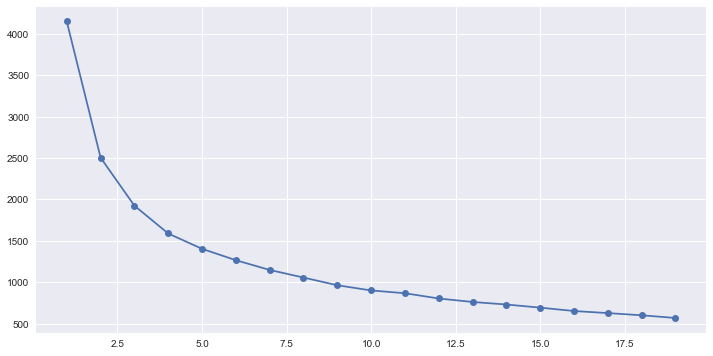

In [227]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker="o")

In [228]:
kmeans=KMeans(n_clusters=5).fit(z)
label1=kmeans.labels_ #target variable values
label1

array([1, 1, 0, 1, 1, 0, 4, 4, 3, 2, 3, 3, 4, 1, 2, 1, 1, 1, 4, 1, 1, 4,
       3, 3, 4, 4, 4, 3, 4, 1, 1, 4, 1, 4, 1, 1, 2, 1, 3, 0, 3, 4, 1, 1,
       1, 0, 4, 3, 4, 4, 2, 4, 3, 1, 1, 2, 2, 3, 1, 1, 0, 3, 2, 1, 4, 3,
       4, 1, 1, 1, 4, 3, 1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 3, 4, 1,
       1, 2, 0, 1, 1, 3, 4, 2, 2, 1, 0, 0, 0, 1, 3, 3, 1, 1, 0, 2, 2, 3,
       1, 4, 1, 1, 2, 1, 0, 4, 1, 1, 1, 1, 0, 1, 3, 0, 3, 1, 0, 1, 4, 3,
       3, 2, 2, 2, 2, 1, 0, 2, 4, 3, 0, 1, 0, 2, 3, 0, 0, 0, 1, 1, 3, 2,
       1, 3, 0, 2, 1, 1, 3, 1, 1, 2, 2, 4, 1, 3, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 4, 0, 2, 1, 1, 1, 4, 1, 1, 0, 3, 1, 2, 1, 2, 1, 1, 1, 1, 1, 4,
       2, 3, 1, 3, 0, 0, 4, 3, 2, 2, 2, 1, 1, 1, 4, 1, 2, 2, 1, 2, 2, 1,
       1, 3, 4, 3, 3, 4, 0, 0, 0, 2, 1, 2, 2, 2, 0, 2, 3, 2, 2, 1, 0, 4,
       4, 0, 4, 4, 2, 1, 1, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 0, 0, 3, 1, 2,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 3, 1, 2, 1, 0, 1, 3, 0, 0, 1, 1, 2, 1,
       0, 1, 0, 1, 1, 2, 3, 1, 1, 0, 3, 2, 3, 1, 1,

In [229]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from mlxtend.evaluate import confusion_matrix

In [230]:
#confusion Matrix
confusion_matrix(y_act,label1)

array([[148,  27,  84, 124,  44],
       [ 14, 264,  77,  25,  23],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0]])

In [231]:
# to prepare a confusion matrix, the two target variables , no need to be in same type
print(y_act.shape, type(y_act))
print(label.shape,type(label))


(830,) <class 'pandas.core.series.Series'>
(830,) <class 'numpy.ndarray'>


In [232]:
accuracy_score(y_act,label1)

0.4963855421686747

In [233]:
print('recall value:',metrics.recall_score(y_test,y_pred))
print('\nPrecision value:',metrics.precision_score(y_test,y_pred))

recall value: 0.8738738738738738

Precision value: 0.7950819672131147


#### HIREARCHICAL CLUSTERING(Agglometrative clustering)

In [234]:
from scipy.cluster.hierarchy import dendrogram,linkage
dff.head()

,BI_RADS_assessment,age,shape,margin,density,severity
0,4,49,2,4,2,1
2,4,40,3,4,2,1
3,3,10,0,0,2,0
8,4,39,0,4,2,1
10,4,58,0,3,2,1


In [235]:
y=df['severity']
X=df.drop('severity',1)

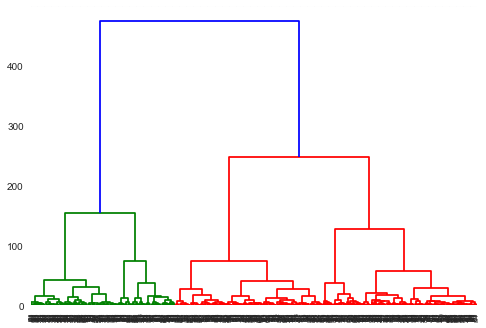

In [236]:
Z=linkage(X,'ward')#single ,complete, average,centroid,wards
dendrogram(Z,labels=X.index,leaf_rotation=90)
plt.show()

In [237]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
label2=cluster.fit_predict(X)
label2

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [238]:
label2.shape

(830,)

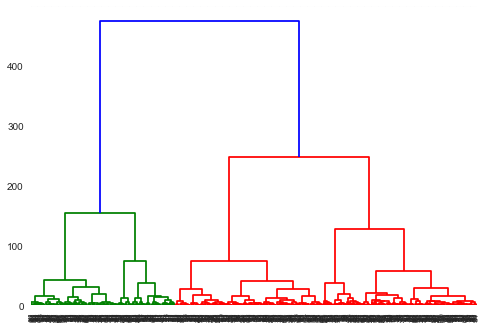

In [239]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(X,'ward')
dendrogram(linked,leaf_rotation=90)
plt.show()

In [240]:
print('the confusion matrix:\n',confusion_matrix(y_act,label2))

the confusion matrix:
 [[214 213]
 [348  55]]


In [241]:
print('Accuracy score:',accuracy_score(y_act,label2))

Accuracy score: 0.3240963855421687


In [242]:
print('recall value:',metrics.recall_score(y_test,y_pred))
print('/nPrecision value:',metrics.precision_score(y_test,y_pred))

recall value: 0.8738738738738738
/nPrecision value: 0.7950819672131147


In [243]:
## by comparing the KMeans cluster and Hirearchy accuracy scores we get the highest to  Hireacrchy accuracy viz=70%

#### Again concanting with main data with the highest accuracy i.e label2 from HC

In [244]:
again=pd.DataFrame(label2,columns=["label"])
again.head()
again.shape

(830, 1)

In [245]:
dff.shape

(830, 6)

In [246]:
dff=df.copy()
dff.severity.value_counts()
dff=dff.set_index(np.arange(0,830))
dff.head()

,BI_RADS_assessment,age,shape,margin,density,severity
0,4,49,2,4,2,1
1,4,40,3,4,2,1
2,3,10,0,0,2,0
3,4,39,0,4,2,1
4,4,58,0,3,2,1


In [247]:
again

,label
0,0
1,0
2,1
3,0
4,0
5,1
6,1
7,0
8,0
9,0


In [248]:
dff['label']=again

In [249]:
dff.drop('severity',1)
dff

,BI_RADS_assessment,age,shape,margin,density,severity,label
0,4,49,2,4,2,1,0
1,4,40,3,4,2,1,0
2,3,10,0,0,2,0,1
3,4,39,0,4,2,1,0
4,4,58,0,3,2,1,0
5,2,24,1,0,2,1,1
6,3,18,2,0,1,0,1
7,3,42,1,0,1,0,0
8,3,36,0,0,2,0,0
9,2,34,2,3,2,0,0


In [250]:
dff.shape

(830, 7)

In [251]:
(dff.isnull().sum())/len(dff)

BI_RADS_assessment    0.0
age                   0.0
shape                 0.0
margin                0.0
density               0.0
severity              0.0
label                 0.0
dtype: float64

In [252]:
dff.describe().T

,count,mean,std,min,25%,50%,75%,max
BI_RADS_assessment,830.0,3.342169,0.659736,0.0,3.0,3.0,4.0,6.0
age,830.0,37.739759,14.581322,0.0,28.0,39.0,48.0,71.0
shape,830.0,1.781928,1.242361,0.0,1.0,2.0,3.0,3.0
margin,830.0,1.813253,1.567175,0.0,0.0,2.0,3.0,4.0
density,830.0,1.915663,0.350936,0.0,2.0,2.0,2.0,3.0
severity,830.0,0.485542,0.500092,0.0,0.0,0.0,1.0,1.0
label,830.0,0.322892,0.467864,0.0,0.0,0.0,1.0,1.0


In [253]:
# df.dropna(inplace=True)

In [254]:
dff.shape

(830, 7)

In [255]:
y=dff['label']
X=dff.drop('label',1)


In [256]:
X.head()

,BI_RADS_assessment,age,shape,margin,density,severity
0,4,49,2,4,2,1
1,4,40,3,4,2,1
2,3,10,0,0,2,0
3,4,39,0,4,2,1
4,4,58,0,3,2,1


In [257]:
#Train_test splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(622, 6) (622,)
(208, 6) (208,)


### Logistic Model

In [258]:
from sklearn.linear_model import LogisticRegression

In [259]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [260]:
y_pred=lr.predict(X_test)

In [261]:
#Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from mlxtend.evaluate import confusion_matrix

In [262]:
cm=confusion_matrix(y_test,y_pred,binary=True)
cm

array([[145,   1],
       [  4,  58]])

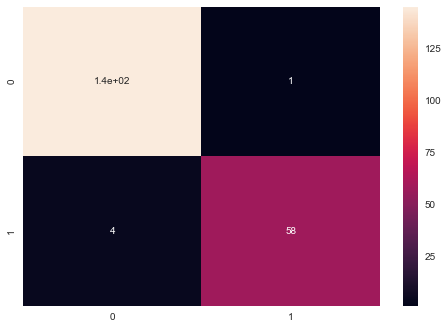

In [263]:
sns.heatmap(cm,annot=True)

TP=91,FN=9,TN=104,FP=4

In [264]:
print('classification_report:\n',classification_report(y_test,y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       146
           1       0.98      0.94      0.96        62

    accuracy                           0.98       208
   macro avg       0.98      0.96      0.97       208
weighted avg       0.98      0.98      0.98       208



In [265]:
print('Accuracy_score:',accuracy_score(y_test,y_pred))

Accuracy_score: 0.9759615384615384


In [266]:
print('recall value:',metrics.recall_score(y_test,y_pred))
print('/nPrecision value:',metrics.precision_score(y_test,y_pred))

recall value: 0.9354838709677419
/nPrecision value: 0.9830508474576272


### KNN Model

In [267]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [268]:
y_pred=classifier.predict(X_test)

In [269]:
#model evaluation
from mlxtend.evaluate import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [270]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 1.0


In [271]:
#K value
from sklearn.model_selection import cross_val_score

In [272]:
k_range=range(1,31)#list of scores from k_range
k_scores=[]
#1.we will loop through resonable values of k
for k in k_range:
   #2.run KNeighborsClassifier with k neighbours
   knn=KNeighborsClassifier(n_neighbors=k)
   #3.Obtain cross_val_score for KNeighborsClassifier with k neighbours
   scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
   #4.append mean of scores for k neighbors to k_scores list
   k_scores.append(scores.mean())
print(k_scores)

[0.9975756685277697, 0.998780487804878, 0.9975900116144019, 0.9975900116144019, 0.9915512223108461, 0.9927560415879547, 0.9915365293928329, 0.9939465177784308, 0.9939465177784308, 0.9963414634146343, 0.9915365293928329, 0.995150987224158, 0.9915365293928329, 0.9939465177784308, 0.9915365293928329, 0.9927270055833087, 0.9915221863062005, 0.9915221863062005, 0.9915221863062005, 0.9915221863062005, 0.9915221863062005, 0.9939465177784308, 0.9927270055833087, 0.9939318248604174, 0.9939465177784308, 0.9975609756097562, 0.9975609756097562, 0.9975609756097562, 0.9975609756097562, 0.9975609756097562]


Text(0, 0.5, 'Cross_Validated Accuracy')

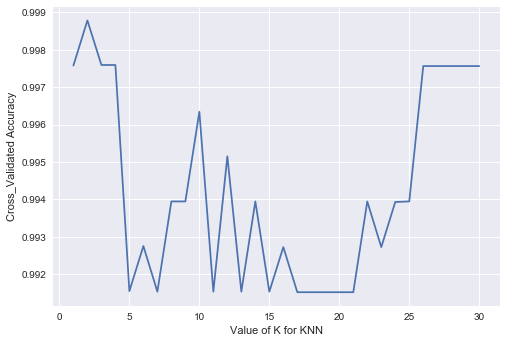

In [273]:
#plot the value of K for KNN(X_axis) versus the cross_validated accuracy(y_axis)
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross_Validated Accuracy')


In [274]:
classifier=KNeighborsClassifier(n_neighbors=16)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [275]:
y_pred=classifier.predict(X_test)

In [276]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.9855769230769231


In [277]:
print('the confusion matrix:\n',confusion_matrix(y_test,y_pred))

the confusion matrix:
 [[143   3]
 [  0  62]]


In [278]:
print('precision value:',metrics.precision_score(y_test,y_pred,average='micro'))

precision value: 0.9855769230769231


In [279]:
print('the recall value:',metrics.recall_score(y_test,y_pred,average='micro'))

the recall value: 0.9855769230769231


### Naive Bayes Model

In [280]:
# import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [281]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [282]:
y_pred=gnb.predict(X_test)


In [283]:
from mlxtend.evaluate import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [284]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.8798076923076923


In [285]:
print('recall value:',metrics.recall_score(y_test,y_pred))
print('/nPrecision value:',metrics.precision_score(y_test,y_pred))

recall value: 0.8548387096774194
/nPrecision value: 0.7681159420289855


### Decision Tree

In [286]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [287]:
y_pred=classifier.predict(X_test)

In [288]:
#Building a Decision Tree

In [289]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import os

In [290]:
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

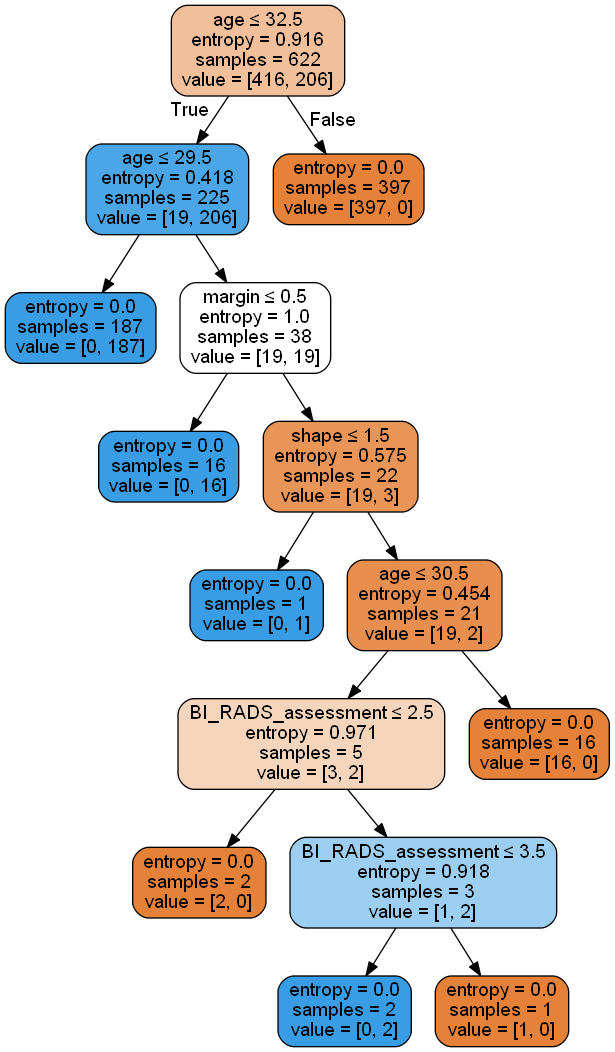

In [291]:
dot_data=StringIO()
export_graphviz(classifier,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=X.columns,
                class_names=None)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('mammogram.png')
Image(graph.create_png())

In [292]:
clf=DecisionTreeClassifier(class_weight=None,
    criterion='entropy',
    splitter='best',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=3,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=5,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    presort=False
)

In [293]:
#train the mode after pruning the tree
clf=clf.fit(X_train,y_train)

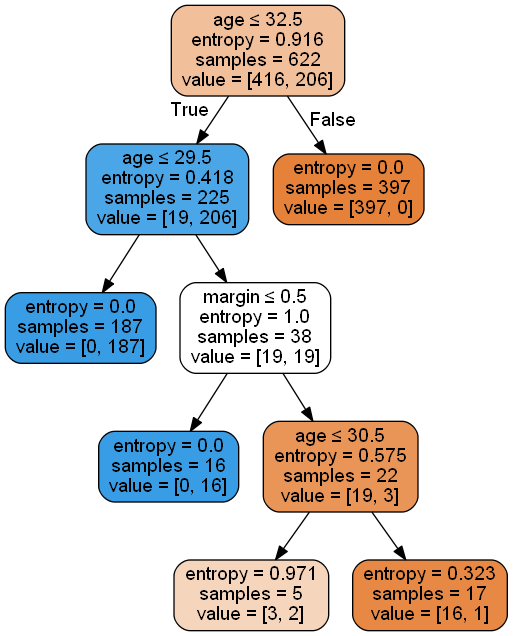

In [294]:
dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=X.columns,
                class_names=None)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())

In [295]:
y_pred=clf.predict(X_test)

In [296]:
print('Accuracy _score:',accuracy_score(y_test,y_pred))

Accuracy _score: 1.0


In [297]:
print('recall value:',metrics.recall_score(y_test,y_pred))
print('/nPrecision value:',metrics.precision_score(y_test,y_pred))

recall value: 1.0
/nPrecision value: 1.0


### Random Forest

In [298]:
from sklearn.ensemble import RandomForestClassifier
 
    #create a Gaussian Classifier
    
clf=RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
)

In [299]:
clf.fit(X_train,y_train)
#predict the model
y_pred=clf.predict(X_test)

In [300]:
y_pred=clf.predict(X_test)
print('Accuracy _score:',accuracy_score(y_test,y_pred))

Accuracy _score: 1.0


In [301]:
print('recall value:',metrics.recall_score(y_test,y_pred))
print('/nPrecision value:',metrics.precision_score(y_test,y_pred))

recall value: 1.0
/nPrecision value: 1.0


### Stacking

In [302]:
from vecstack import stacking

from mlxtend.classifier import StackingClassifier

In [303]:
dff.head()

,BI_RADS_assessment,age,shape,margin,density,severity,label
0,4,49,2,4,2,1,0
1,4,40,3,4,2,1,0
2,3,10,0,0,2,0,1
3,4,39,0,4,2,1,0
4,4,58,0,3,2,1,0


In [304]:
y=dff['label']
X=dff.drop('label',1)

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [306]:
models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=1),

    RandomForestClassifier(random_state=0, n_jobs=1,
                           n_estimators=100, max_depth=3),

    XGBClassifier(random_state=0, n_jobs=1, learning_rate=0.1,
                  n_estimators=100, max_depth=3)
]

In [307]:
S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=accuracy_score,

                           n_folds=4,

                           stratified=True,

                           shuffle=True,

                           random_state=0,

                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.99315068]
    fold  1:  [1.00000000]
    fold  2:  [0.98620690]
    fold  3:  [0.97931034]
    ----
    MEAN:     [0.98966698] + [0.00771589]
    FULL:     [0.98967298]

model  1:     [RandomForestClassifier]
    fold  0:  [1.00000000]
    fold  1:  [1.00000000]
    fold  2:  [0.99310345]
    fold  3:  [0.99310345]
    ----
    MEAN:     [0.99655172] + [0.00344828]
    FULL:     [0.99655766]

model  2:     [XGBClassifier]
    fold  0:  [1.00000000]
    fold  1:  [0.99310345]
    fold  2:  [0.98620690]
    fold  3:  [0.98620690]
    ----
    MEAN:     [0.99137931] + [0.00571832]
    FULL:     [0.99139415]



#### Random Forest without scaling with PCA

In [308]:
 dff.head()

,BI_RADS_assessment,age,shape,margin,density,severity,label
0,4,49,2,4,2,1,0
1,4,40,3,4,2,1,0
2,3,10,0,0,2,0,1
3,4,39,0,4,2,1,0
4,4,58,0,3,2,1,0


In [309]:
dff.isnull().sum()

BI_RADS_assessment    0
age                   0
shape                 0
margin                0
density               0
severity              0
label                 0
dtype: int64

In [310]:
y=dff.label
X=dff.drop('label',1)

In [311]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [312]:
#Apply PCA
from sklearn.decomposition import PCA

In [313]:
#PCA for all features
pca=PCA()
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

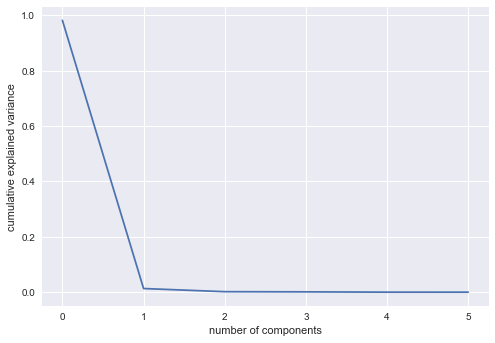

In [314]:

#Explained variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [315]:
## applying Random Forest
from sklearn.ensemble import RandomForestClassifier
 
    #create a Gaussian Classifier
    
clf=RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
)

In [316]:
clf.fit(X_train,y_train)
#predict the model
y_pred=clf.predict(X_test)

In [317]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from mlxtend.evaluate import confusion_matrix
from sklearn import metrics
y_pred=clf.predict(X_test)
print('Accuracy _score:',accuracy_score(y_test,y_pred))

Accuracy _score: 0.9939759036144579


In [318]:
print('recall value:',metrics.recall_score(y_test,y_pred))
print('/nPrecision value:',metrics.precision_score(y_test,y_pred))

recall value: 1.0
/nPrecision value: 0.9803921568627451


inference: the accuracy percentage has increased from 98 to  0.9939759036144579  after performing the PCA
 

#### Building a model With scaling ,PCA,Random Forest

In [319]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [320]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

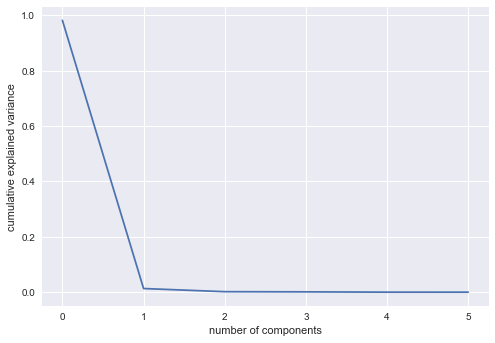

In [321]:
#Explained variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [322]:
from sklearn.ensemble import RandomForestClassifier
 
    #create a Gaussian Classifier
    
clf=RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
)

In [323]:
clf.fit(X_train,y_train)
#predict the model
y_pred=clf.predict(X_test)

In [324]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[116,   0],
       [  0,  50]])

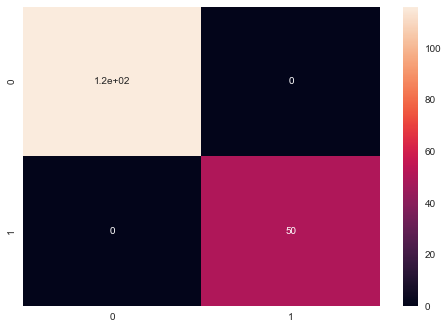

In [328]:
sns.heatmap(cm,annot=True)
plt.savefig('confusion matirx')

In [326]:
y_pred=clf.predict(X_test)
print('Accuracy _score:',accuracy_score(y_test,y_pred))

Accuracy _score: 1.0


In [327]:
print('recall value:',metrics.recall_score(y_test,y_pred))
print('/nPrecision value:',metrics.precision_score(y_test,y_pred))

recall value: 1.0
/nPrecision value: 1.0


Inference: The accuracy doesn't change with scaling ,PCA even without scaling and PCA. viz 1.0,

CONCLUSION: Hence we consider the model 3 as the best model though it contains the one feature or component it gives the best accuracy score instead of considering the 6 components like model1 i.e without scaling and PCA